In [2]:
import numpy as np
import math
import os
from matplotlib import pyplot as plt
#image processing libraries
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float,img_as_float64,img_as_uint
from skimage import io
from skimage import feature
import skimage.data as imgData

In [ ]:
from nd2reader import ND2Reader
with ND2Reader('122718 y3469tr_001_xy04_1b.nd2') as images:
    print(images[0])

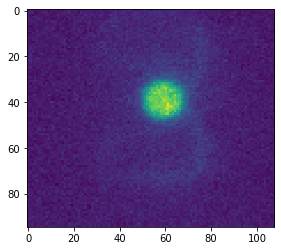

In [11]:
# load DIC and calculate sum
chamber = io.imread("GFP 122718 y3469tr_001_xy04_crop_3a",plugin='tifffile')
dims = chamber.shape
new_chamber = np.zeros((dims[0],dims[2],dims[3]),np.float32)
for t in range(len(chamber)):
    for z in range(dims[1]):
        for y in range(dims[2]):
            for x in range(dims[3]):
                new_chamber[t][y][x]+=chamber[t][z][y][x]
plt.imshow(new_chamber[1])
io.imsave('SUM_GFP 122718 y3469tr_001_xy04_3a.tif',new_chamber,'tifffile')

In [19]:
dic = io.imread('SUM_DIC 122718 y3469tr_001_xy04_crop_3a.tif',plugin='tifffile')
gfp = io.imread("SUM_GFP 122718 y3469tr_001_xy04_3a.tif",plugin='tifffile')

vals = []
vals_max = []
time=0
x_length = dic.shape[2]
background = []

while(time<72):
    #find chamber interesting area
    max_dic = np.argmax(dic[time])
    max_dic_x = max_dic%x_length
    max_dic_y = math.floor(max_dic/x_length)
    chamber_area = gfp[time,:,max_dic_x-5:max_dic_x+5]

    max_gfp = np.argmax(chamber_area)
    max_gfp_x = max_gfp%10+max_dic_x-5
    max_gfp_y = math.floor(max_gfp/10)

    #draw interesting circle

#     print(max_gfp_x)
#     print(max_gfp_y)

    #find max in background
    aoi = gfp[time,:,max_gfp_x-20:max_gfp_x+20]
    tmp = []
    for ele in aoi.flatten():
        if ele >30000:
            tmp.append(ele)
    aoi = tmp
#     plt.hist(aoi, bins = 30)
#     plt.show()
    hist = np.histogram(aoi,30)
    nums = hist[0][np.argmax(hist[0]):]
    d1 = []
    d2 = []
    for i in range(len(nums)-1):
        d1.append(nums[i]-nums[i+1])
    for i in range(len(d1)-1):
        d2.append(d1[i]-d1[i+1])
    max_d2 = np.argmax(d2)
    max_back = (hist[1][max_d2+1]+hist[1][max_d2+2])/2

    vals.append(gfp[time,max_gfp_y,max_gfp_x]-max_back)
    vals_max.append(gfp[time,max_gfp_y,max_gfp_x])
    background.append(max_back)
    time += 1
# plt.figure(figsize=(20,10))
# plt.plot(range(72),vals,color='red')
# plt.title('local intensity')
# plt.show()
# plt.figure(figsize=(20,10))
# plt.plot(range(72),vals_max,color='red')
# plt.title('max intensity')
# plt.show()


In [32]:
vals_max[29]

69021.0

In [ ]:
dic = io.imread('SUM_DIC 122718 y3469tr_001_xy04_1b.tif',plugin='tifffile')
gfp = io.imread("SUM_GFP 122718 y3469tr_001_xy04_1b.tif",plugin='tifffile')
pbd = io.imread("SUM_PBD 122718 y3469tr_001_xy04_1b.tif",plugin='tifffile')
new_img = np.zeros((dic.shape[0],dic.shape[1],dic.shape[2],3))
for i in range(dic.shape[0]):
    dic_min = np.amin(dic[i])
    print(dic_min)
    dic_max = np.amax(dic[i])
    gfp_min = np.amin(gfp[i])
    gfp_max = np.amax(gfp[i])
    pbd_min = np.amin(pbd[i])
    pbd_max = np.amax(pbd[i])
    for j in range(dic.shape[1]):
        for k in range(dic.shape[2]):
            new_img[i][j][k][0]=(255*(dic[i][j][k]-dic_min)/(dic_max-dic_min))
            new_img[i][j][k][1]=(255*(gfp[i][j][k]-gfp_min)/(gfp_max-gfp_min))
            new_img[i][j][k][2]=(255*(pbd[i][j][k]-pbd_min)/(pbd_max-pbd_min))
new_img = new_img.astype(np.uint8)
   

In [ ]:
dic = io.imread('SUM_DIC 122718 y3469tr_001_xy04_1b.tif',plugin='tifffile')
new_img = np.zeros((dic.shape[0],dic.shape[1],dic.shape[2],1))
for i in range(dic.shape[0]):
    dic_min = np.amin(dic[i])
    dic_max = np.amax(dic[i])
    for j in range(dic.shape[1]):
        for k in range(dic.shape[2]):
            new_img[i][j][k]=(255*(dic[i][j][k]-dic_min)/(dic_max-dic_min))
new_img = new_img.astype(np.uint8)

In [ ]:
for i in range(72):
    io.imsave('dic_001/'+str(i)+'.png',new_img[i])

In [ ]:
test = io.imread('img_0_mask.png')

In [ ]:
def array_to_png(img):
  dim = img.shape
  new = np.zeros((dim[0],dim[1],dim[2],3))
  for t in range(dim[0]):
    dic_min = np.amin(img[t,:,:,0])
    dic_max = np.amax(img[t,:,:,0])
    gfp_min = np.amin(img[t,:,:,1])
    gfp_max = np.amax(img[t,:,:,1])
    pbd_min = np.amin(img[t,:,:,2])
    pbd_max = np.amax(img[t,:,:,2])
    for y in range(dim[1]):
      for x in range(dim[2]):
        new[t][y][x][0]=(255*(img[t,y,x,0]-dic_min)/(dic_max-dic_min))
        new[t][y][x][1]=(255*(img[t,y,x,1]-gfp_min)/(gfp_max-gfp_min))
        new[t][y][x][2]=(255*(img[t,y,x,2]-pbd_min)/(pbd_max-pbd_min))
  new = new.astype(np.uint8)
  return new

In [10]:
vals_max


[40985.0,
 42040.04,
 44483.73,
 48506.727,
 109753.57,
 125783.85,
 46908.98,
 69430.39,
 68521.266,
 64446.117,
 91631.84,
 108130.164,
 164639.28,
 83211.445,
 58626.45,
 46659.83,
 46787.793,
 60089.707,
 68024.68,
 128140.84,
 125104.7,
 70880.17,
 66585.125,
 45524.01,
 55109.312,
 75998.625,
 125517.3,
 65062.234,
 60631.496,
 67680.33,
 69711.26,
 62772.61,
 50495.28,
 66307.195,
 154911.8,
 91742.81,
 128163.89,
 157901.2,
 78290.05,
 83002.51,
 154058.5,
 153082.44,
 155450.27,
 167662.78,
 164815.14,
 186034.83,
 118766.51,
 169447.66,
 175625.61,
 111756.13,
 81683.68,
 70471.61,
 67072.42,
 50392.48,
 57849.6,
 55991.113,
 46083.844,
 46205.76,
 42481.707,
 59928.473,
 44604.297,
 45455.61,
 45742.137,
 23949.756,
 34732.438,
 42610.605,
 46018.977,
 52309.387,
 35147.688,
 44045.34,
 43156.855,
 45039.133]